In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 151 entries, Province/State to 6/16/20
dtypes: float64(2), int64(147), object(2)
memory usage: 313.9+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 151 entries, Province/State to 6/16/20
dtypes: float64(2), int64(147), object(2)
memory usage: 313.9+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


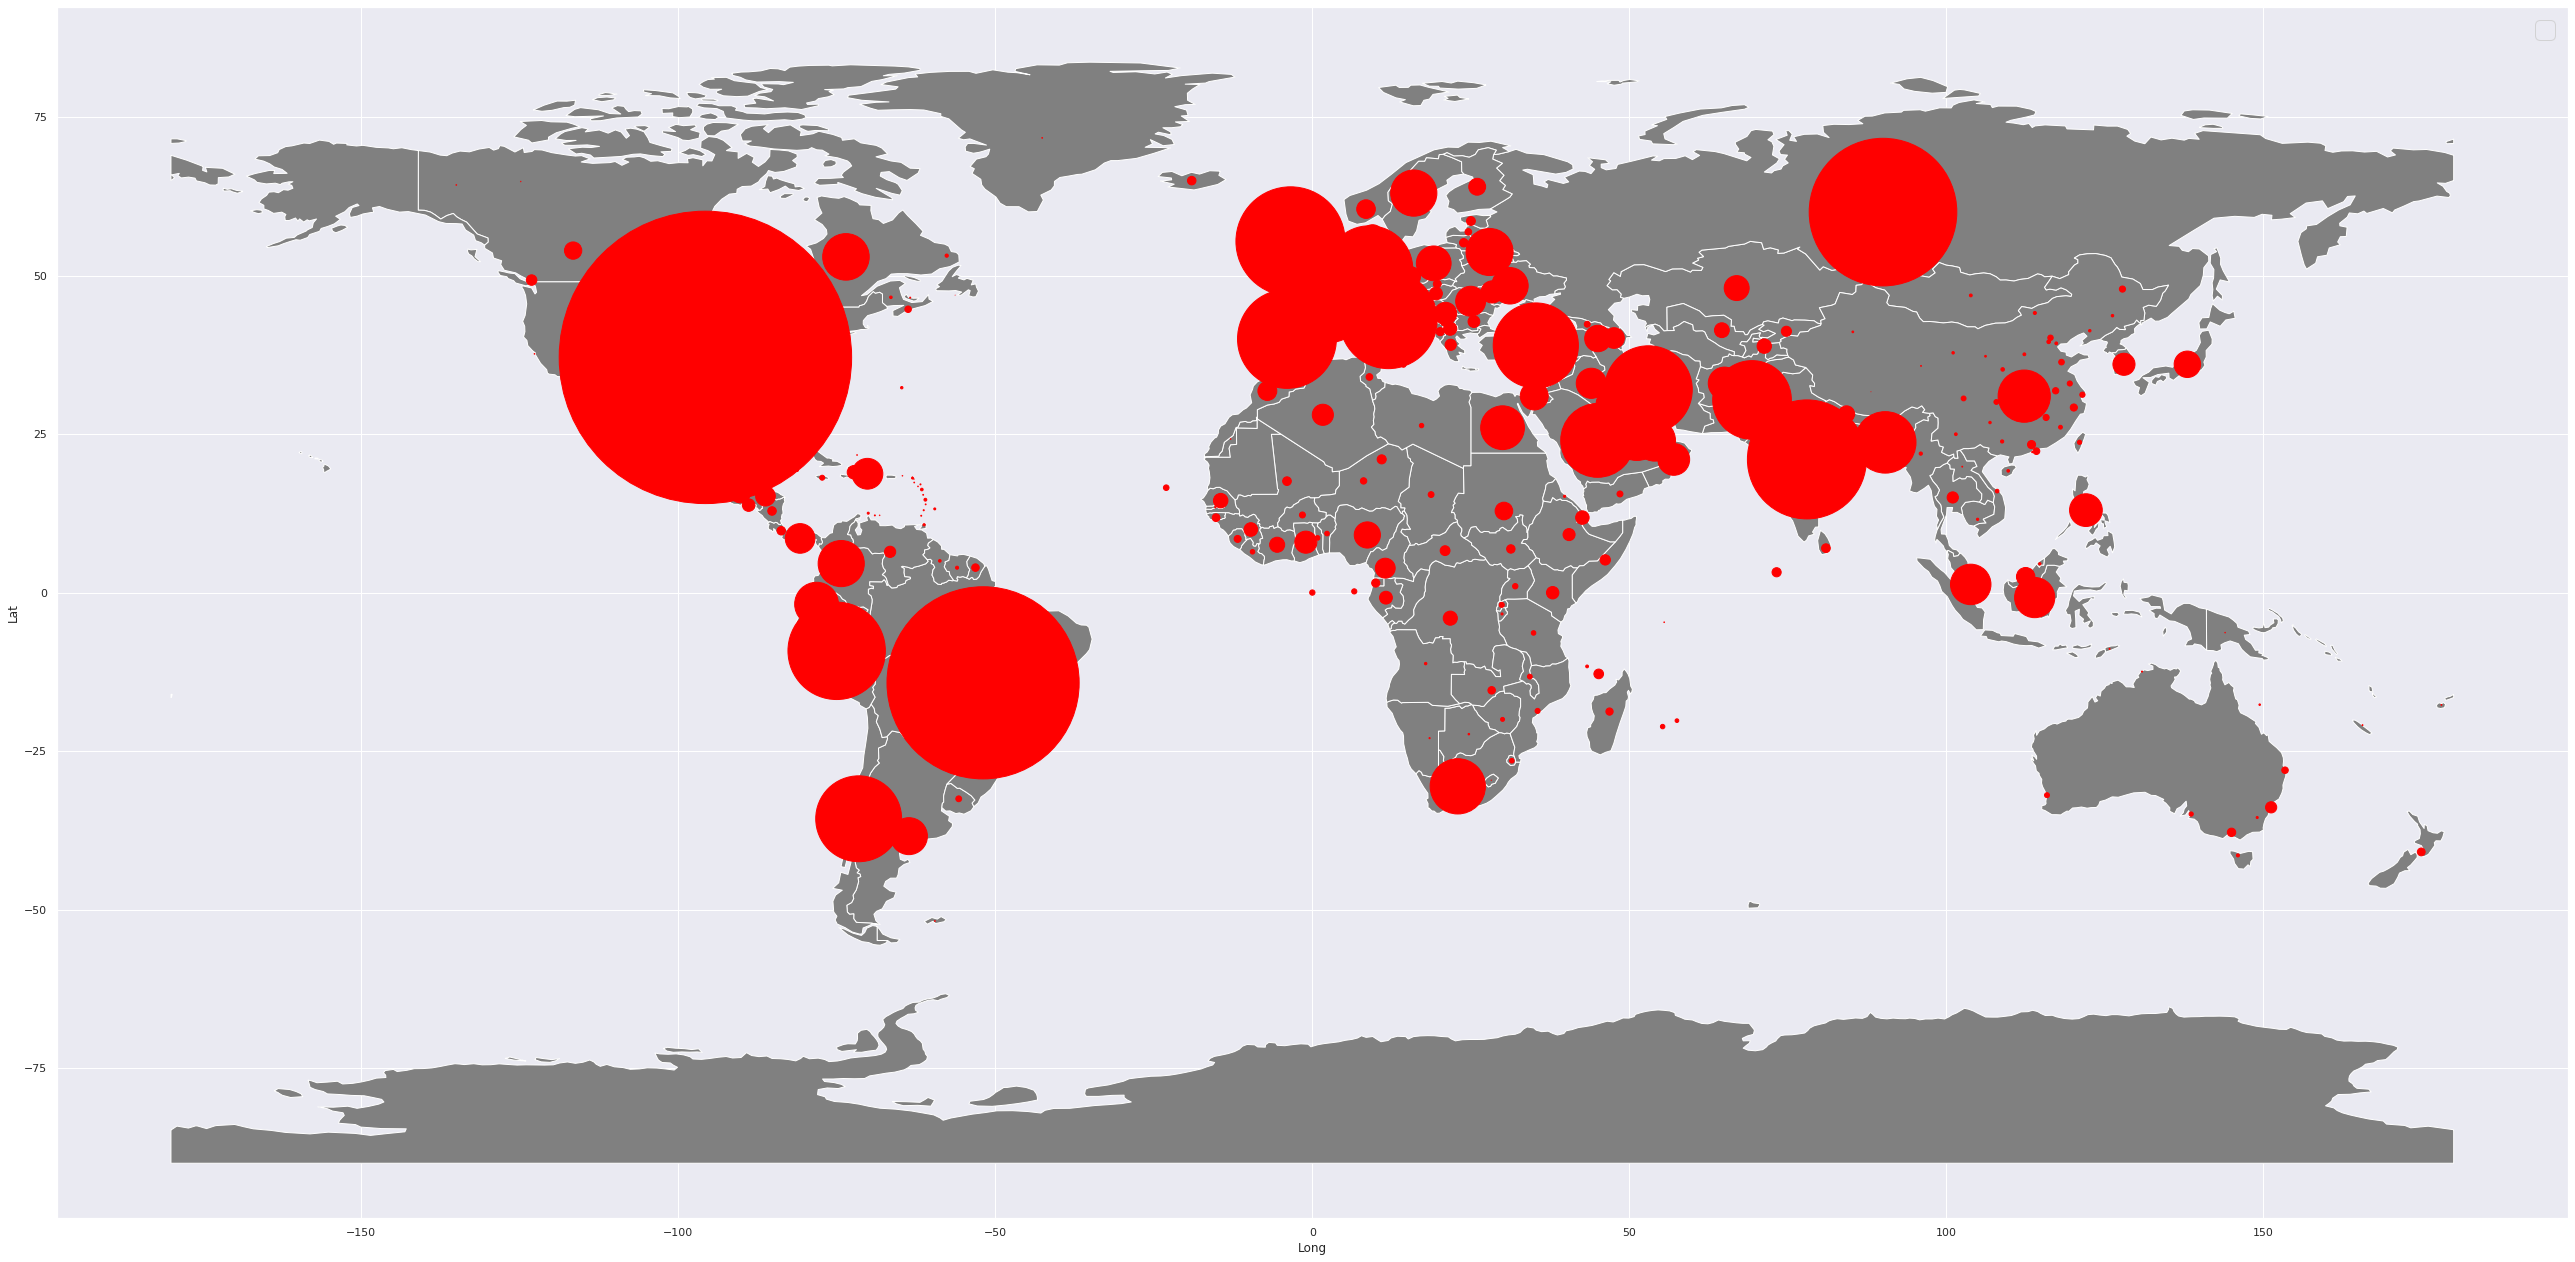

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/25, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/12/20,731,547386,173085,150376,171535,79472,445123,10691,72695,780
6/13/20,743,556606,174865,150376,171970,79475,459436,10718,72931,784
6/14/20,752,561816,176370,150376,172089,79482,469141,10730,72982,788
6/15/20,771,576334,177010,150376,172692,79489,477709,10760,73168,792


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/12/20,1612,19211,8982,1464,3481,8132,22008,614,117,2233
6/13/20,1662,20059,9491,1464,3603,8455,22572,615,117,2238
6/14/20,1715,21418,9845,1464,3720,8858,22962,617,123,2248
6/15/20,1744,21422,10272,1464,3826,9178,23271,621,123,2262


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/12/20,12,421,351,55,68,306,568,10,8,84
6/13/20,12,429,367,55,72,310,577,10,8,84
6/14/20,12,437,384,55,74,312,592,10,8,84
6/15/20,12,448,399,55,74,322,605,10,8,84


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/12/20,1612,19211,8982,1464,3481,8132,22008,614,117,2233
6/13/20,1662,20059,9491,1464,3603,8455,22572,615,117,2238
6/14/20,1715,21418,9845,1464,3720,8858,22962,617,123,2248
6/15/20,1744,21422,10272,1464,3826,9178,23271,621,123,2262


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/12/20,12,421,351,55,68,306,568,10,8,84
6/13/20,12,429,367,55,72,310,577,10,8,84
6/14/20,12,437,384,55,74,312,592,10,8,84
6/15/20,12,448,399,55,74,322,605,10,8,84


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
6/12/20,1.048114,1.033627,1.049176,1.000000,1.032019,1.060373,1.026636,1.004910,1.000000,1.006309
6/13/20,1.031017,1.044141,1.056669,1.000000,1.035047,1.039720,1.025627,1.001629,1.000000,1.002239
6/14/20,1.031889,1.067750,1.037298,1.000000,1.032473,1.047664,1.017278,1.003252,1.051282,1.004468
6/15/20,1.016910,1.000187,1.043372,1.000000,1.028495,1.036126,1.013457,1.006483,1.000000,1.006228


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,104,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,92,92,96,96,96,96,96,97,97,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,1059,1060,1061,1061,1061,1061,1061,1061,1061,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,40847,40847,42206,43810,45344,46994,48896,53168,53211,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,1342,1375,1461,1538,1612,1662,1715,1744,1796,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,2200,2205,2211,2219,2233,2238,2248,2262,2273,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,20126,20415,20808,21437,22008,22572,22962,23271,23686,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,3104,3191,3274,3373,3481,3603,3720,3826,3941,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,729,773,865,917,1043,1161,1255,1326,1421,POINT (-53.12580 3.93390)


In [36]:
temp.drop([41,82,109,113,115,125, 158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,geometry
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,104,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,92,92,96,96,96,96,96,97,97,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,1342,1375,1461,1538,1612,1662,1715,1744,1796,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,2200,2205,2211,2219,2233,2238,2248,2262,2273,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,20126,20415,20808,21437,22008,22572,22962,23271,23686,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,3104,3191,3274,3373,3481,3603,3720,3826,3941,POINT (-88.89650 13.79420)
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,729,773,865,917,1043,1161,1255,1326,1421,POINT (-53.12580 3.93390)
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,41,41,41,41,42,42,42,42,42,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,7502,7866,8221,8561,8982,9491,9845,10272,10706,POINT (-90.23080 15.78350)


In [38]:
len(temp)

21

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'6/15/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,6/15/20,6/16/20
0,NaN,Dominican Republic,23271,23686
1,NaN,Panama,21422,21962
2,NaN,Guatemala,10272,10706
3,NaN,Honduras,9178,9656
4,NaN,Haiti,4441,4547
5,NaN,El Salvador,3826,3941
6,NaN,Cuba,2262,2273
7,NaN,Nicaragua,1464,1823
8,NaN,Costa Rica,1744,1796
9,French Guiana,France,1326,1421


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,61,61,62,62,62,62,62,62,62,62
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,1265,1373,1373,1439,1505,1562,1623,1670,1808,1808
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,10,11,11,12,12,12,12,12,12,12
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,83,83,83,83,84,84,84,84,84,84
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,538,539,544,550,561,568,577,592,605,615
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,53,56,60,64,68,68,72,74,74,76
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,1,2,2,2,2,2,2,3,3,5


In [49]:
temp_deaths.drop([41,82,109,113,115,125,158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [50]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,10,11,11,12,12,12,12,12,12,12
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,83,83,83,83,84,84,84,84,84,84
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,538,539,544,550,561,568,577,592,605,615
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,53,56,60,64,68,68,72,74,74,76
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,1,2,2,2,2,2,2,3,3,5
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,252,267,289,316,334,351,367,384,399,418


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'6/15/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,6/15/20,6/16/20
0,NaN,Dominican Republic,605,615
1,NaN,Panama,448,457
2,NaN,Guatemala,399,418
3,NaN,Honduras,322,330
4,NaN,Cuba,84,84
5,NaN,Haiti,76,80
6,NaN,El Salvador,74,76
7,NaN,Nicaragua,55,64
8,Sint Maarten,Netherlands,15,15
9,NaN,Costa Rica,12,12


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,22
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,62,64,64,67,68,68,68,68,68,72
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,81,81,81,83,83,83,83,83,83,83
24,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,14414,16459,16459,16566,17366,17823,18749,19460,19985,19986
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,704,712,717,722,722,731,743,752,771,794
80,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,1862,1868,1880,1886,1893,1902,1923,1948,1965,1994
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,12007,12158,12208,12318,12541,12754,13084,13320,14025,14133
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,1305,1379,1419,1438,1504,1587,1738,1846,1926,2041


In [59]:
temp_recovered.drop([24,73,87,101,102,106,114,119,154,186,188,202,217, 222, 225, 227,235,236,237, 242], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,22
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,62,64,64,67,68,68,68,68,68,72
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,81,81,81,83,83,83,83,83,83,83
76,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,704,712,717,722,722,731,743,752,771,794
80,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,1862,1868,1880,1886,1893,1902,1923,1948,1965,1994
88,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,12007,12158,12208,12318,12541,12754,13084,13320,14025,14133
91,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,1305,1379,1419,1438,1504,1587,1738,1846,1926,2041
99,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,383,400,427,457,462,489,520,534,552,619
107,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,33,33,33,33,33,36,36,36,36,36
116,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,1261,1323,1413,1504,1567,1702,1804,1886,1966,2096


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'6/15/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,6/15/20,6/16/20
0,NaN,Dominican Republic,14025,14133
1,NaN,Panama,13766,13774
2,NaN,Guatemala,1966,2096
3,NaN,El Salvador,1926,2041
4,NaN,Cuba,1965,1994
5,NaN,Nicaragua,953,1238
6,NaN,Honduras,1025,1075
7,NaN,Costa Rica,771,794
8,French Guiana,France,552,619
9,NaN,Jamaica,430,449


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
1,Bahamas,0,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,104
2,Barbados,0,0,0,0,0,0,0,0,0,...,92,92,92,96,96,96,96,96,97,97
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,1318,1342,1375,1461,1538,1612,1662,1715,1744,1796
4,Cuba,0,0,0,0,0,0,0,0,0,...,2191,2200,2205,2211,2219,2233,2238,2248,2262,2273
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,19600,20126,20415,20808,21437,22008,22572,22962,23271,23686
6,El Salvador,0,0,0,0,0,0,0,0,0,...,3015,3104,3191,3274,3373,3481,3603,3720,3826,3941
7,French Guiana,0,0,0,0,0,0,0,0,0,...,689,729,773,865,917,1043,1161,1255,1326,1421
8,St Martin,0,0,0,0,0,0,0,0,0,...,41,41,41,41,41,42,42,42,42,42
9,Guatemala,0,0,0,0,0,0,0,0,0,...,7055,7502,7866,8221,8561,8982,9491,9845,10272,10706


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,10,11,11,12,12,12,12,12,12,12
4,Cuba,0,0,0,0,0,0,0,0,0,...,83,83,83,83,84,84,84,84,84,84
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,538,539,544,550,561,568,577,592,605,615
6,El Salvador,0,0,0,0,0,0,0,0,0,...,53,56,60,64,68,68,72,74,74,76
7,French Guiana,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,3,3,5
8,St Martin,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,Guatemala,0,0,0,0,0,0,0,0,0,...,252,267,289,316,334,351,367,384,399,418


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,22
1,Bahamas,0,0,0,0,0,0,0,0,0,...,62,64,64,67,68,68,68,68,68,72
2,Barbados,0,0,0,0,0,0,0,0,0,...,81,81,81,83,83,83,83,83,83,83
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,704,712,717,722,722,731,743,752,771,794
4,Cuba,0,0,0,0,0,0,0,0,0,...,1862,1868,1880,1886,1893,1902,1923,1948,1965,1994
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,12007,12158,12208,12318,12541,12754,13084,13320,14025,14133
6,El Salvador,0,0,0,0,0,0,0,0,0,...,1305,1379,1419,1438,1504,1587,1738,1846,1926,2041
7,French Guiana,0,0,0,0,0,0,0,0,0,...,383,400,427,457,462,489,520,534,552,619
8,St Martin,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,36,36,36,36,36
9,Guatemala,0,0,0,0,0,0,0,0,0,...,1261,1323,1413,1504,1567,1702,1804,1886,1966,2096


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(109, 21)

In [75]:
recovered_camcar_all.shape

(109, 21)

In [76]:
deaths_camcar_all.shape

(109, 21)

In [77]:
active_camcar_all.shape

(109, 21)